In [1]:
import torch
from torch.autograd import Variable
from torch import optim

## Defining Model

In [2]:
def build_model():
    '''
    Builds linear model with no bias 
    '''
    model = torch.nn.Sequential()
    model.add_module("linear", torch.nn.Linear(1,1, bias = False))
    return model

In [3]:
build_model()

Sequential(
  (linear): Linear(in_features=1, out_features=1, bias=False)
)

In [4]:
#Setting Parameters
model = build_model()
loss = torch.nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
batch_size = 10

## Training Function

In [5]:
def train(model, loss, optimizer, x, y):
    '''
    Training Function 
    Input: Model, Loss Function, Optimization Function,
            Input tensors(x), Output Tensors(y)
    Output: Predicted tensor values in output variable
    '''
    x = Variable(x, requires_grad = False)
    y = Variable(y, requires_grad = False)
    
    optimizer.zero_grad() #Reset gradient
    
    fwd = model.forward(x.view(len(x), 1)).squeeze() #Forward Prop
    output = loss.forward(fwd, y)
    
    output.backward() #Backward Prop
    
    optimizer.step() #Update parameters
    
    return output.item()

## Data

In [6]:
torch.manual_seed(42)
X = torch.linspace(-1, 1, 101)
Y = 2 * X + torch.randn(X.size()) * 0.33

In [7]:
X[0:10]

tensor([-1.0000, -0.9800, -0.9600, -0.9400, -0.9200, -0.9000, -0.8800, -0.8600,
        -0.8400, -0.8200])

In [8]:
Y[:10]

tensor([-1.3641, -1.4692, -1.6228, -2.5748, -1.6161, -2.2074, -1.7742, -2.2495,
        -1.9282, -1.0959])

Here the model is :<br>

<center> Y = Weight * X + Bias </center> <br>

where, *Weight* : 2 and *Bias* : random numbers between (-1/3,1/3)

## Training

In [9]:
train_loss = []
for i in range(40):
    cost = 0.0
    num_batches = len(X)//batch_size
    for k in range(num_batches):
        start, end = k*batch_size, (k+1)*batch_size
        cost += train(model, loss, optimizer, X[start:end], Y[start:end])
    train_loss.append(cost/num_batches)
    print("Epoch = %d, cost = %s" % (i + 1, cost / num_batches))

w = next(model.parameters()).data  # model has only one parameter
print("w = %.2f" % w.numpy()) 

Epoch = 1, cost = 0.8334392964839935
Epoch = 2, cost = 0.40854152143001554
Epoch = 3, cost = 0.15445153154432772
Epoch = 4, cost = 0.10608361847698689
Epoch = 5, cost = 0.10965216681361198
Epoch = 6, cost = 0.10969704426825047
Epoch = 7, cost = 0.10695727020502091
Epoch = 8, cost = 0.10555919148027897
Epoch = 9, cost = 0.10524852983653546
Epoch = 10, cost = 0.10518739111721516
Epoch = 11, cost = 0.10514633357524872
Epoch = 12, cost = 0.10512987487018108
Epoch = 13, cost = 0.10513494089245796
Epoch = 14, cost = 0.10514459758996964
Epoch = 15, cost = 0.10515031963586807
Epoch = 16, cost = 0.10515191480517387
Epoch = 17, cost = 0.10515143796801567
Epoch = 18, cost = 0.1051504746079445
Epoch = 19, cost = 0.10514972098171711
Epoch = 20, cost = 0.10514934696257114
Epoch = 21, cost = 0.10514927096664906
Epoch = 22, cost = 0.10514932163059712
Epoch = 23, cost = 0.10514939576387405
Epoch = 24, cost = 0.10514945015311242
Epoch = 25, cost = 0.10514947585761547
Epoch = 26, cost = 0.105149474740028

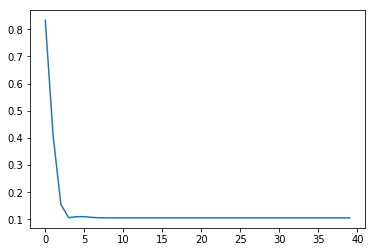

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_loss)

# Conclusion
The predicted value for linear model, is 1.98 which close to 2.